In [1]:
using PyPlot
using LinearAlgebra # for svd and trig functions
using Printf
using Statistics # for mean function

In [2]:
function plot_singular_vectors(V_or_U, ax, width, head_length, head_width, labels, label_dist)
    x_plot = V_or_U .- head_length .* V_or_U ./ norm.(V_or_U)
    ax.arrow(0, 0, x_plot[1,1], x_plot[2,1], width=width, head_width=head_width,
        head_length=head_length, fc="#a9a9a9", ec="#a9a9a9", zorder=10)
    ax.arrow(0, 0, x_plot[1,2], x_plot[2,2], width=width, head_width=head_width,
        head_length=head_length, fc="#a9a9a9", ec="#a9a9a9", zorder=10)
    x_label = V_or_U .+ V_or_U ./ norm(V_or_U) .* label_dist
    ax.text(x_label[1,1], x_label[2,1], labels[1], fontsize=20)
    ax.text(x_label[1,2], x_label[2,2], labels[2], fontsize=20)
end

plot_singular_vectors (generic function with 1 method)

In [3]:
function move_axes_to_origin(ax, axes_coords::Union{Missing, Array{Float64,2}}=missing)
    ax.xaxis.tick_bottom()
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("bottom")
    ax.spines["right"].set_position("zero")
    ax.spines["right"].set_linewidth(3.5)
    ax.spines["left"].set_color("none")
    ax.yaxis.tick_right()
    ax.spines["top"].set_position("zero")
    ax.spines["top"].set_linewidth(3.5)
    ax.spines["bottom"].set_color("none")
    ax.set_axisbelow(false)
    ax.set_xticks([])
    ax.set_yticks([])
    if typeof(axes_coords) != Missing
        @assert length(axes_coords) == 4 && size(axes_coords) == (2,2)
        ax.xaxis.set_label_coords(axes_coords[1,1], axes_coords[1,2])
        ax.yaxis.set_label_coords(axes_coords[2,1], axes_coords[2,2])
    end
end

move_axes_to_origin (generic function with 2 methods)

In [4]:
function plot_apple_unit_circle(ax, T::Array{Float64, 2}; N::Int=250)
    # Lets first grab the `hsv` colormap from the matplotlib package 
    #  and normalize it using `vmin` and `vmax`
    # set_array([]) is an obscure trick which allows me to use 
    #  the colormap properly for some reason
    cnorm = PyPlot.matplotlib.colors.Normalize(vmin=0, vmax=2*π)
    m = plt.cm.ScalarMappable(norm=cnorm, cmap=plt.cm.hsv)
    m.set_array([])
    
    θ = range(0, stop=2*π, length=N)
    a = transpose(hcat(cos.(θ), sin.(θ)))
    
    for i = 1:length(θ)-1
        ax.plot([a[1,i], a[1,i+1]], [a[2,i], a[2,i+1]], lw=8, c=m.to_rgba(mean(θ[i:i+1])))
    end
    
    F = svd(T)

    plot_singular_vectors(F.V, ax, 0.02, 0.1, 0.1,
        ["\$\\mathbf{v}_1\$", "\$\\mathbf{v}_2\$"], 0.2)
    move_axes_to_origin(ax, [1.01 0.59; 0.55 0.97])
    ax.set_aspect("equal")
    ax.set_xlabel("\$a_1^{*}\$", fontsize=20)
    ax.set_ylabel("\$a_2^{*}\$", fontsize=20, rotation=0)
    ax.set_xticks([-1, 1])
    ax.set_xticklabels(ax.get_xticks(), fontsize=18)
    ax.set_yticks([-1, 1])
    ax.set_yticklabels(ax.get_yticks(), fontsize=18)
end

plot_apple_unit_circle (generic function with 1 method)

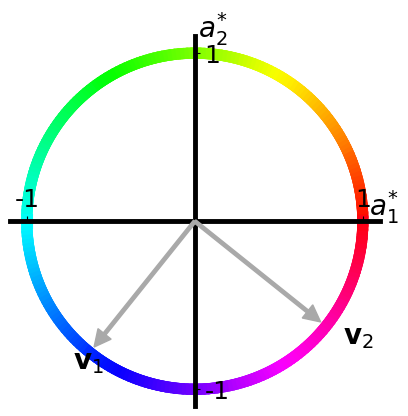

In [5]:
fig, ax = plt.subplots()
T = [26. 74.; 66. 34.]
plot_apple_unit_circle(ax, T)
fig.savefig("apple_circle.png", transparent="true", dpi=300, format="png")

In [6]:
function plot_quality_ellipse(ax, T::Array{Float64, 2}; N::Int=250)
    # We will use the same exact colormap because the colors will
    #  correspond to each other on the unit circle and the ellipse
    cnorm = PyPlot.matplotlib.colors.Normalize(vmin=0, vmax=2*π)
    m = plt.cm.ScalarMappable(norm=cnorm, cmap=plt.cm.hsv)
    m.set_array([])
    
    θ = range(0, stop=2*π, length=N)
    a = transpose(hcat(cos.(θ), sin.(θ)))
    q = T * a
    
    for i = 1:length(θ)-1
        ax.plot([q[1,i], q[1,i+1]], [q[2,i], q[2,i+1]], lw=8, c=m.to_rgba(mean(θ[i:i+1])))
    end
    
    F = svd(T)
    Uσ = F.U .* [F.S[1] F.S[2]; F.S[1] F.S[2]]
    plot_singular_vectors(Uσ, ax, 1.0, 9.0, 9.0,
        ["\$\\mathbf{u}_1\$", "\$\\mathbf{u}_2\$"], 15.)
    move_axes_to_origin(ax, [1.01 0.60; 0.55 0.95])
    ax.set_aspect("equal")
    ax.set_xlabel("\$q_1^{*}\$", fontsize=20)
    ax.set_ylabel("\$q_2^{*}\$", fontsize=20, rotation=0)
    ax.set_xticks([-50, 50])
    ax.set_xticklabels(ax.get_xticks(), fontsize=18)
    ax.set_yticks([-50, 50])
    ax.set_yticklabels(ax.get_yticks(), fontsize=18)
end

plot_quality_ellipse (generic function with 1 method)

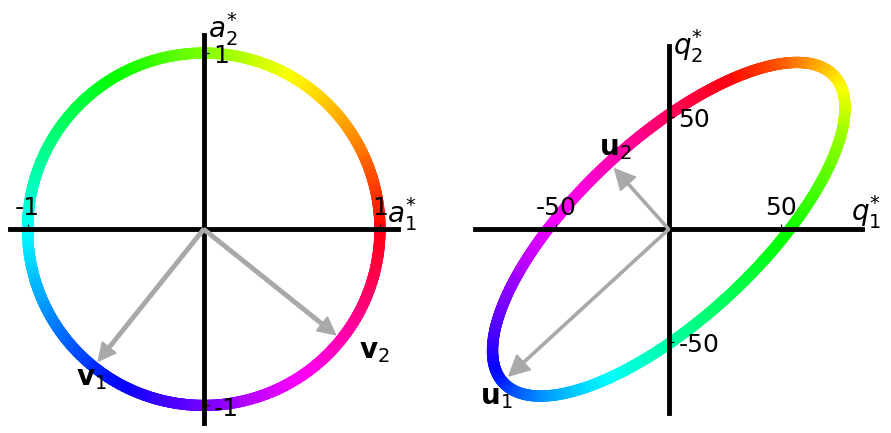

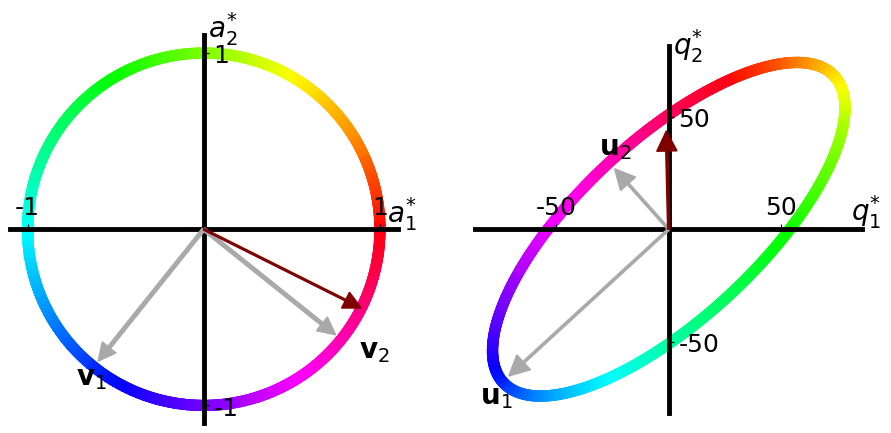

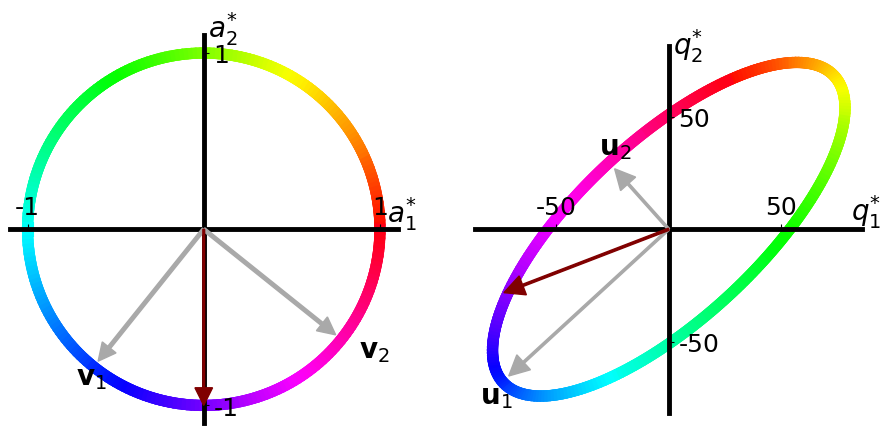

In [18]:
function make_svd_visualization(T::Array{Float64, 2}; extra_arrow::Union{Array{Float64, 1}, Missing}=missing,
                                label_postfix="")
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11, 5), 
                            gridspec_kw = Dict("top" => 1.0, "bottom" => 0.0))

    plot_apple_unit_circle(axs[1], T)
    plot_quality_ellipse(axs[2], T)
    
    if ismissing(extra_arrow)
        fig.savefig("svd_viz" * label_postfix * ".png", transparent="true", format="png", dpi=300)
    else
        extra_arrow = extra_arrow ./ norm(extra_arrow)
        extra_quality_arrow = T * extra_arrow
        x_plot = extra_arrow .- 0.1 .* extra_arrow ./ norm(extra_arrow)
        x_quality_plot = extra_quality_arrow .- 9 .* extra_quality_arrow ./ norm.(extra_quality_arrow)
        axs[1].arrow(0, 0, x_plot[1,1], x_plot[2,1], width=0.01, head_width=0.1,
                 head_length=0.1, fc="#800000", ec="#800000", zorder=10)
        axs[2].arrow(0, 0, x_quality_plot[1,1], x_quality_plot[2,1], width=1., head_width=9.,
                 head_length=9., fc="#800000", ec="#800000", zorder=10)
        fig.savefig("svd_viz_w_vector" * label_postfix * ".png", transparent="true", format="png", dpi=300)
    end
    return
end
T = [26. 74.; 66. 34.]
make_svd_visualization(T)
make_svd_visualization(T, extra_arrow=[4.,-2.])
make_svd_visualization(T, extra_arrow=[0.,-2.], label_postfix="2")